<a href="https://colab.research.google.com/github/yuki-2025/cv_workshops/blob/main/MLFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLFlow - Lecture Notes

- Author Lasya Bhatta

**Introduction**


MLflow is an open-source platform for managing the complete machine learning lifecycle. It helps data scientists and ML engineers streamline the process of developing, tracking, and deploying machine learning models.

**Key Features of MLFlow**

1. Tracking: Log and visualize metrics, parameters, and models from your ML experiments.

2. Projects: Package ML code in a reusable and reproducible format.

3. Models: Manage and deploy machine learning models using a variety of formats.

4. Registry: Store, annotate, and version models in a central repository.

# Setup ngrok for MLflow UI Access

**Step 1: Visit the ngrok Website**

Go to the official ngrok website: https://ngrok.com



**Step 2: Create a Free Account**

Click on the “Sign Up” button (top-right corner).

Fill in your details or sign up using GitHub or Google.

**Step 3: Sign In and Access Your Authtoken**

Once signed in:

1. Click on your profile icon or go to the left-hand menu.

2. Navigate to “Auth” or “Your Authtoken”.

3. Copy your unique authtoken — you'll need this to link ngrok with your environment.

*Note : Keep this token handy — you’ll use it in your notebook or terminal later.*

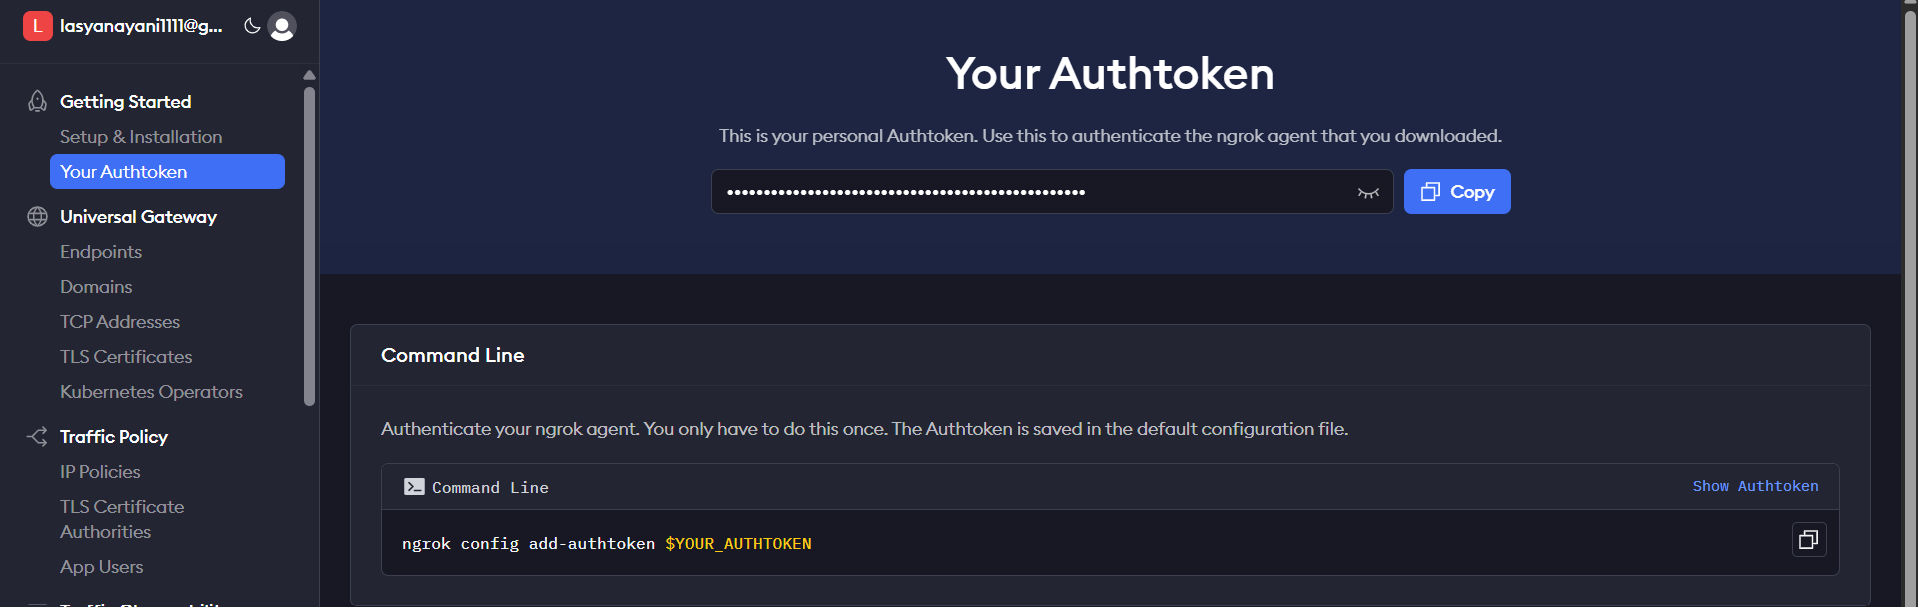

In [ ]:
!pip install mlflow --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 700.2/700.2 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.0/119.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.9/194.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/6

In [ ]:
!pip install pyngrok -q

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import mlflow
import mlflow.tensorflow

In [ ]:
import os
from pyngrok import ngrok
import subprocess

In [ ]:
!pip install pyngrok

**Note**

*1.After running the code block below, a prompt will appear asking for your authentication key.*

*2.Paste your ngrok authtoken into the input box and press Enter to continue.*

In [ ]:
# Imports and ngrok setup
import tensorflow as tf
import tensorflow_datasets as tfds
import mlflow
import mlflow.tensorflow
import subprocess
from pyngrok import ngrok, conf
import getpass
import os

# Set MLflow tracking URI (using local folder, NOT sqlite)
MLFLOW_TRACKING_URI = "./mlruns"

# Start MLflow UI on port 5000
subprocess.Popen(["mlflow", "ui", "--backend-store-uri", MLFLOW_TRACKING_URI, "--port", "5000"])
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
mlflow.set_experiment("EuroSAT Image Classification")

# Ngrok auth token (one-time setup per session)
print("Enter your ngrok authtoken from https://dashboard.ngrok.com/auth")
conf.get_default().auth_token = getpass.getpass()

# Expose MLflow UI to the internet
public_url = ngrok.connect(5000).public_url
print(f'MLflow UI available at: {public_url}')


2025/05/17 04:46:45 INFO mlflow.tracking.fluent: Experiment with name 'EuroSAT Image Classification' does not exist. Creating a new experiment.


Enter your ngrok authtoken from https://dashboard.ngrok.com/auth
··········
MLflow UI available at: https://c02d-34-30-189-24.ngrok-free.app


**Step 4: Click the link below**

Open the following link to access the MLflow UI: https://c02d-34-30-189-24.ngrok-free.app

Then, click on "Visit site" to proceed.

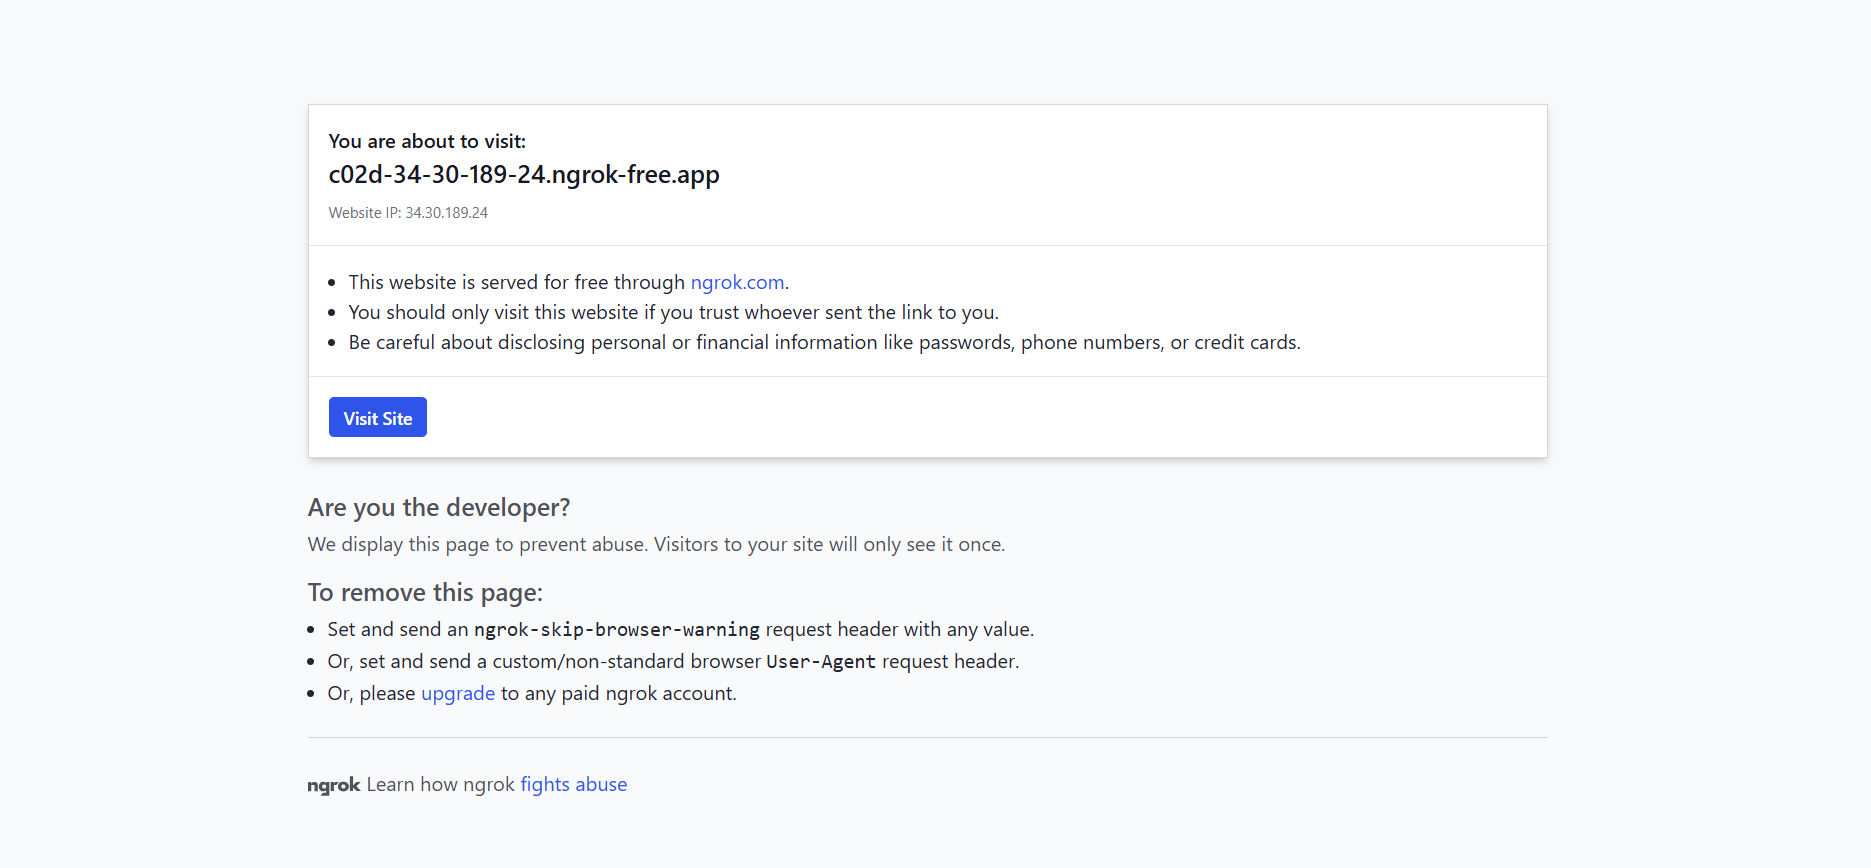

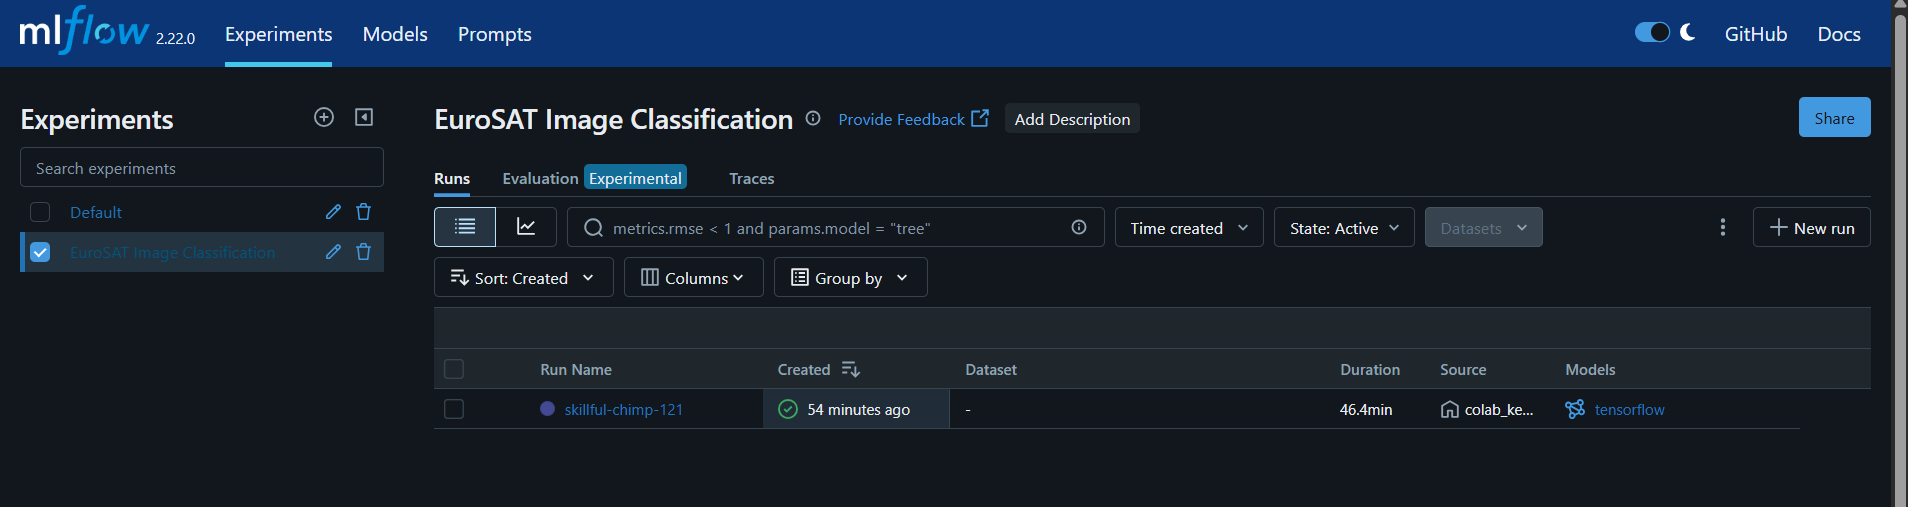

# Working on EuroSAT Dataset

We are using the EuroSAT dataset, which has satellite images of different land types like forests, rivers, highways, and buildings.
Each image is 64×64 pixels in color, and there are 10 classes in total.

In [ ]:
# Load and preprocess EuroSAT dataset
dataset, ds_info = tfds.load(
    'eurosat/rgb',
    split='train',
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

class_names = ds_info.features['label'].names
num_classes = len(class_names)
train_count = int(0.8 * ds_info.splits['train'].num_examples)

train_ds = dataset.take(train_count)
test_ds = dataset.skip(train_count)

def normalize_img(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_ds = train_ds.map(normalize_img).batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.map(normalize_img).batch(32).prefetch(tf.data.AUTOTUNE)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/eurosat/rgb/incomplete.9LW38W_2.0.0/eurosat-train.tfrecord*...:   0%|     …

Dataset eurosat downloaded and prepared to /root/tensorflow_datasets/eurosat/rgb/2.0.0. Subsequent calls will reuse this data.


In [ ]:
# Define CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(64, 64, 3)),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Epoch 1/15
675/675 ━━━━━━━━━━━━━━━━━━━━ 169s 246ms/step - accuracy: 0.4212 - loss: 1.4835 - val_accuracy: 0.6965 - val_loss: 0.8323
Epoch 2/15
675/675 ━━━━━━━━━━━━━━━━━━━━ 159s 236ms/step - accuracy: 0.7007 - loss: 0.8379 - val_accuracy: 0.7567 - val_loss: 0.6850
Epoch 3/15
675/675 ━━━━━━━━━━━━━━━━━━━━ 162s 239ms/step - accuracy: 0.7568 - loss: 0.6646 - val_accuracy: 0.7704 - val_loss: 0.6414
Epoch 4/15
675/675 ━━━━━━━━━━━━━━━━━━━━ 198s 233ms/step - accuracy: 0.7872 - loss: 0.5897 - val_accuracy: 0.7933 - val_loss: 0.5786
Epoch 5/15
675/675 ━━━━━━━━━━━━━━━━━━━━ 212s 248ms/step - accuracy: 0.8053 - loss: 0.5375 - val_accuracy: 0.8231 - val_loss: 0.5120
Epoch 6/15
675/675 ━━━━━━━━━━━━━━━━━━━━ 158s 234ms/step - accuracy: 0.8288 - loss: 0.4748 - val_accuracy: 0.8428 - val_loss: 0.4554
Epoch 7/15
675/675 ━━━━━━━━━━━━━━━━━━━━ 201s 233ms/step - accuracy: 0.8487 - loss: 0.4251 - val_accuracy: 0.8322 - val_loss: 0.4782
Epoch 8/15
675/675 ━━━━━━━━━━━━━━━━━━━━ 168s 248ms/step - accuracy: 0.8606 -

2025/05/17 05:40:30 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2025/05/17 05:40:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Training and MLflow logging complete, including graphs!


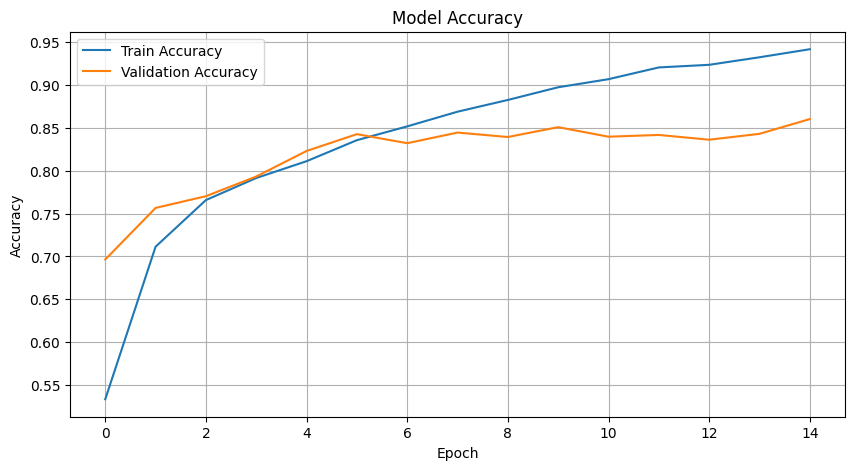

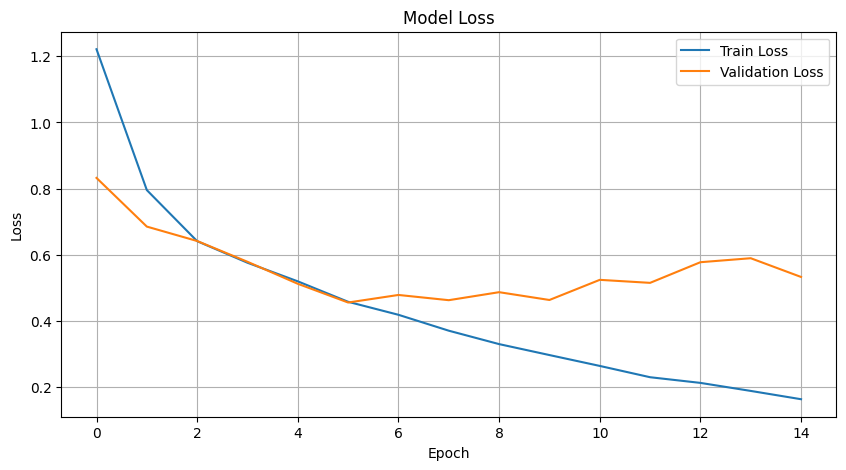

In [ ]:
with mlflow.start_run():
    # Log hyperparameters
    mlflow.log_param("optimizer", "adam")
    mlflow.log_param("epochs", 15)
    mlflow.log_param("batch_size", 32)

    # Train the model
    history = model.fit(
        train_ds,
        validation_data=test_ds,
        epochs=15,
    )

    # Log final metrics
    mlflow.log_metric("val_accuracy", history.history['val_accuracy'][-1])
    mlflow.log_metric("val_loss", history.history['val_loss'][-1])

    # Log the trained model
    mlflow.tensorflow.log_model(model, artifact_path="model")

    # Plot and log graphs
    import matplotlib.pyplot as plt

    # Accuracy plot
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.savefig("accuracy_plot.png")
    mlflow.log_artifact("accuracy_plot.png")

    # Loss plot
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.savefig("loss_plot.png")
    mlflow.log_artifact("loss_plot.png")

    print("Training and MLflow logging complete, including graphs!")



# Results

**Overview Tab:**

Displays a consolidated view of key details like metrics, parameters, run times, and statuses for all experiment runs.

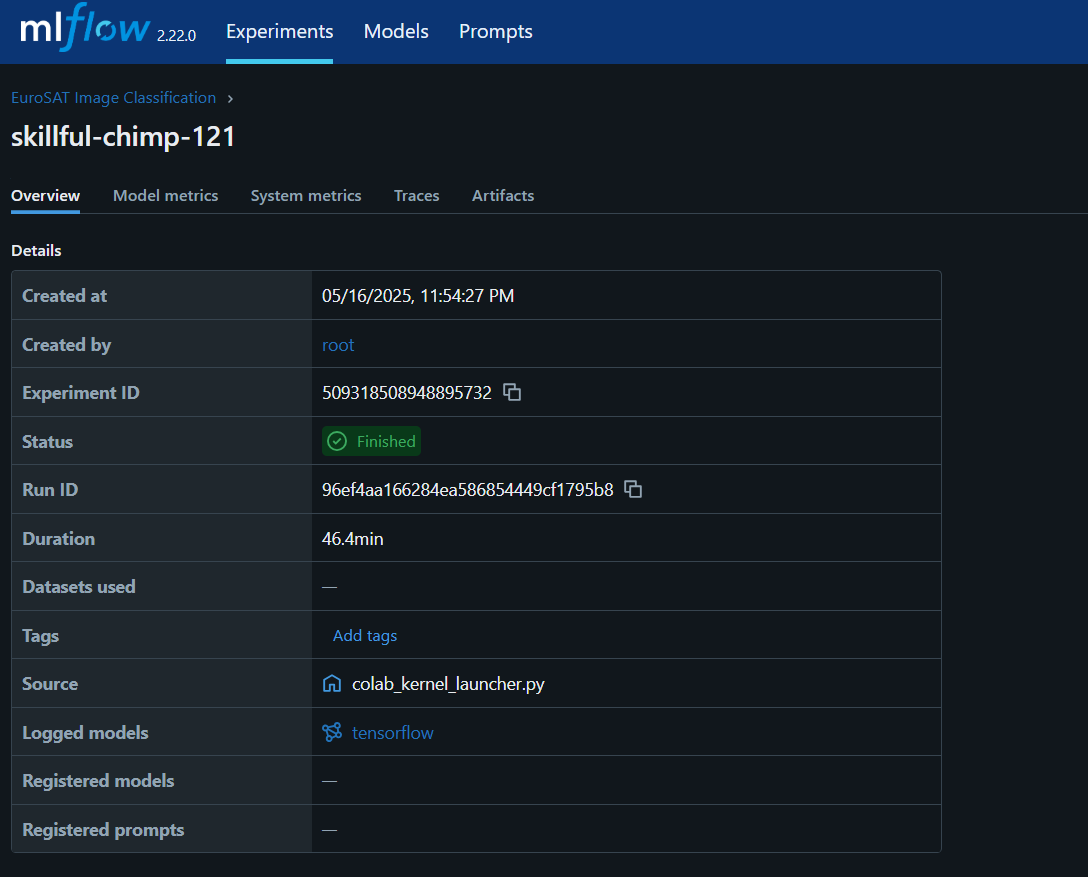

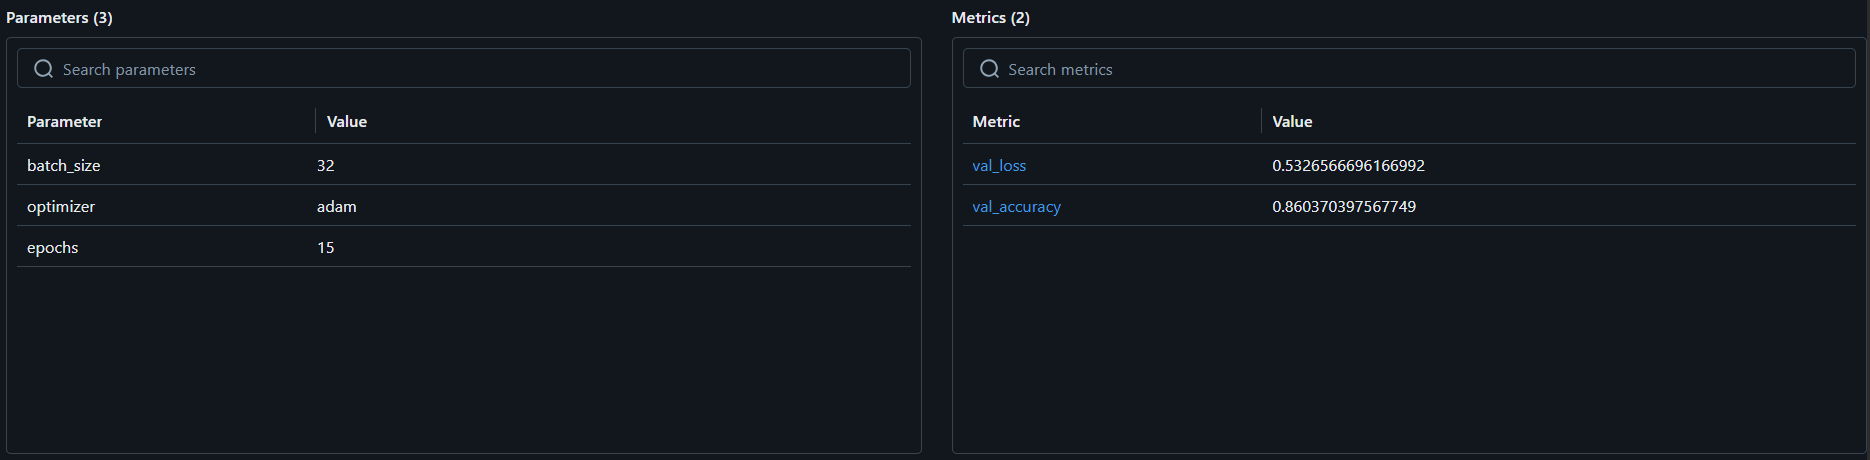

**Model Metrics:**

Displays evaluation metrics (e.g., accuracy, loss) logged during training.

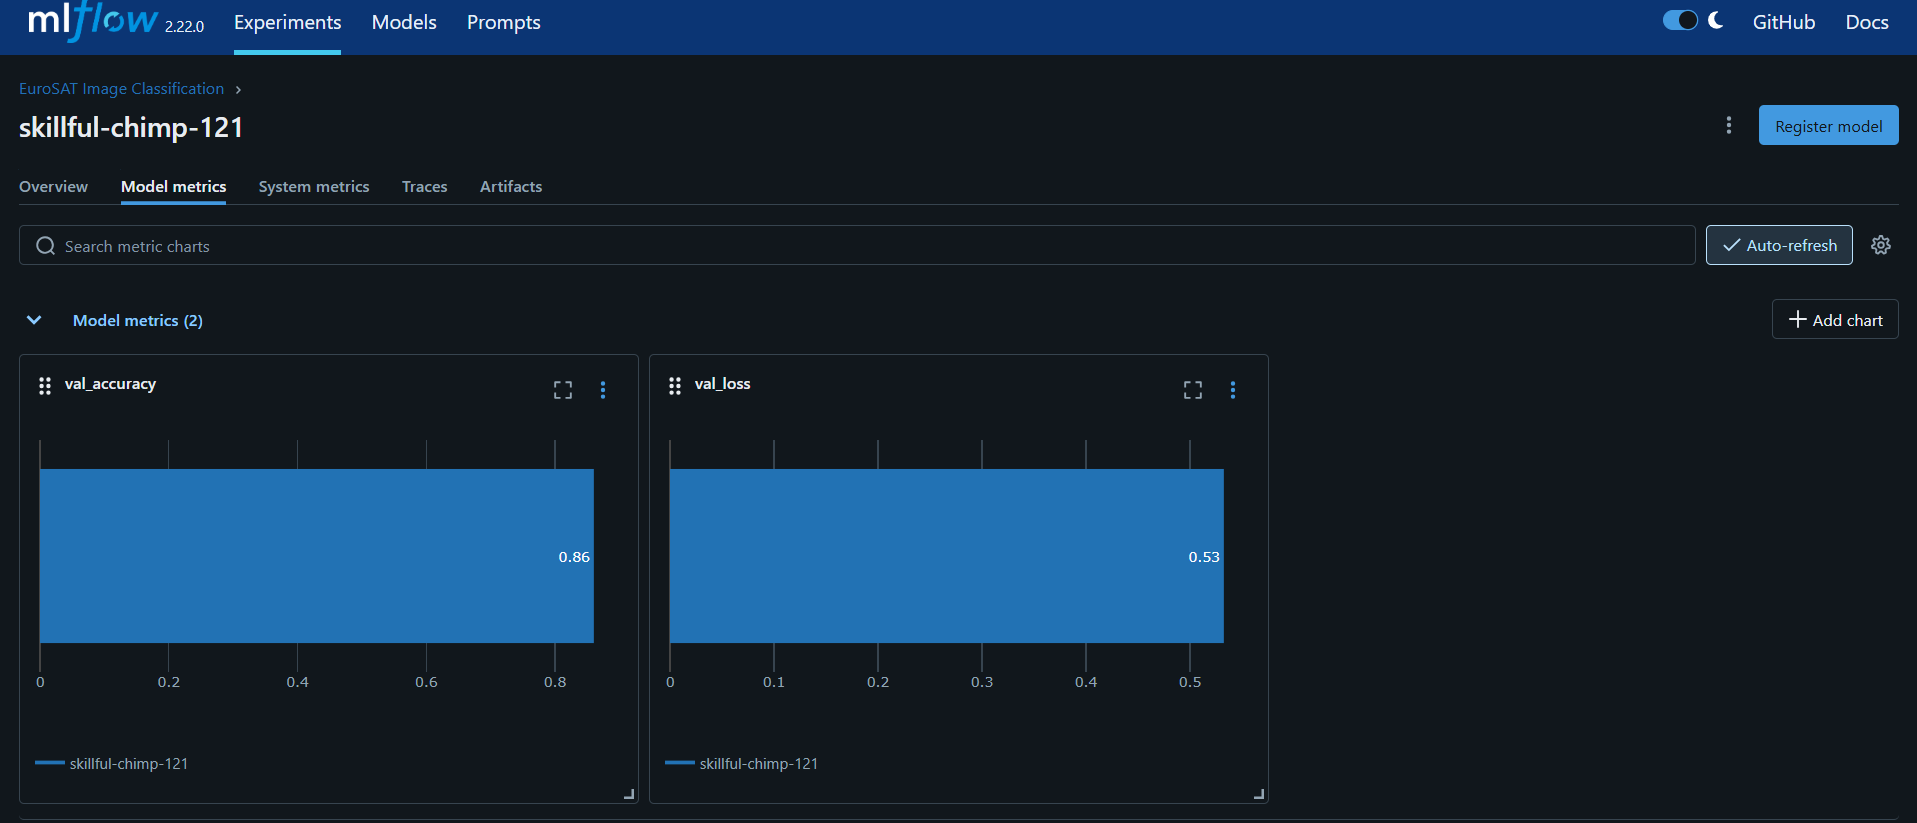

**Artifacts:**

Artifacts are files generated during an ML run. These are saved for reference, reproducibility, and deployment.

These artifacts help with model versioning, reproducibility, and sharing with teammates or production systems.

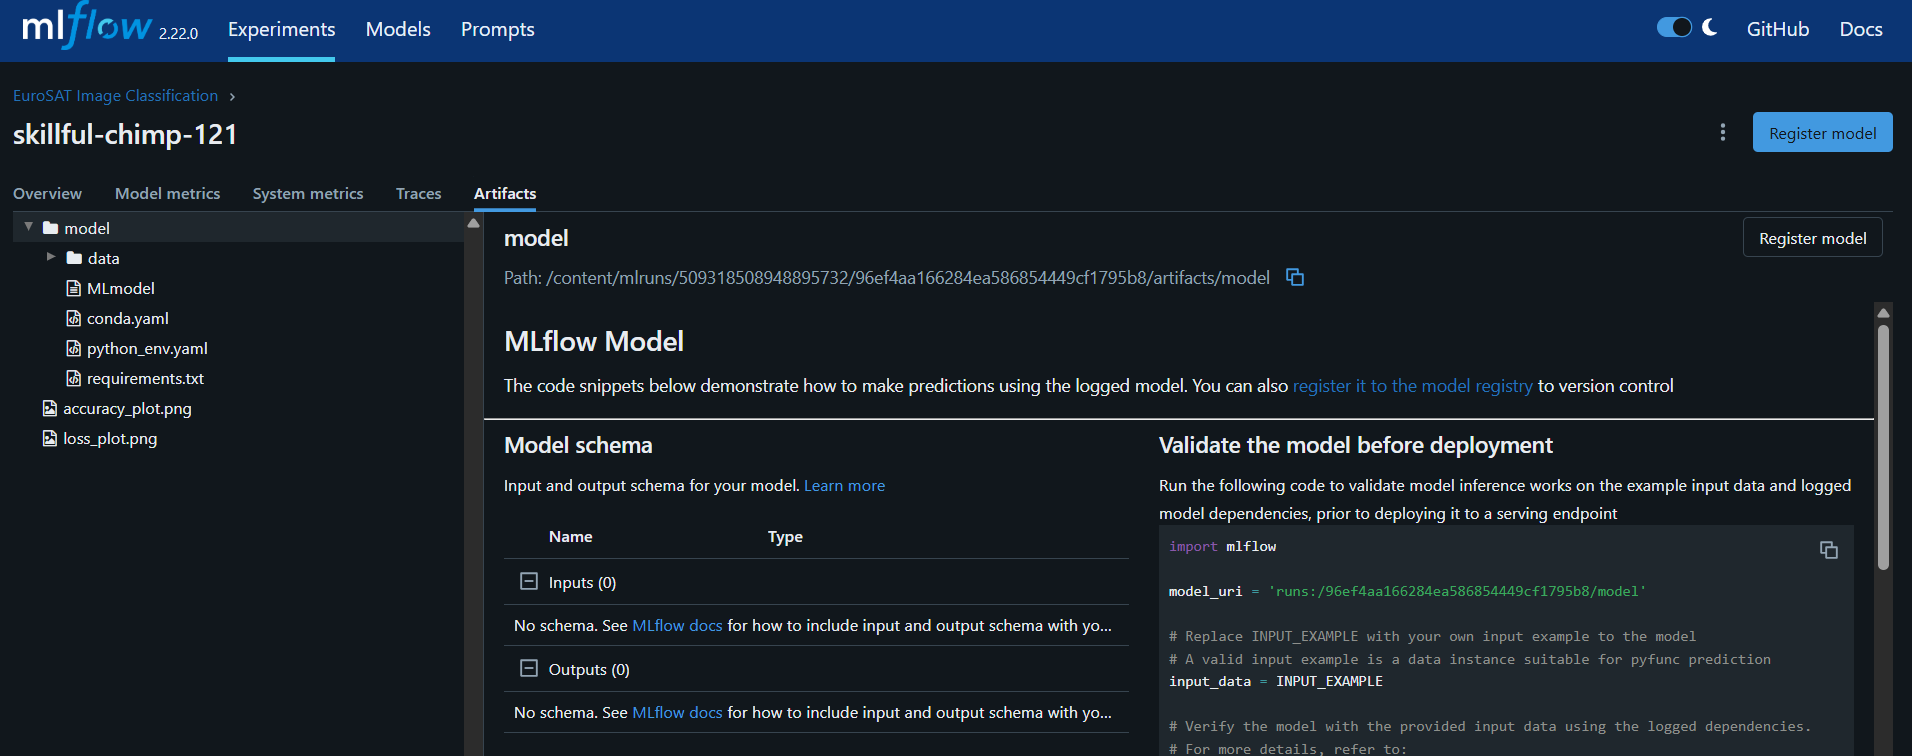